In [33]:
import numpy as np
import h5py
import json
import sys
sys.path.append('F:\Linux')
import illustris_python as il
from datetime import datetime
sys.path.append(r"C:/Users/qq651/OneDrive/Codes/A2project/plot/")
from Tools import *

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import BoundaryNorm, ListedColormap

il1_A2list = np.load('f:/Linux/localRUN/il1_A2withRedshift.npy', allow_pickle=1).item()
tng_A2list = np.load('f:/Linux/localRUN/tng_A2withRedshift.npy', allow_pickle=1).item()
def zbar(haloID, A2list):
    #return bar origin redshift
    Redshift = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 1.0, 1.5, 2.0]
    A2 = np.array(A2list[haloID])
    z=0
    for i in range(1,10): 
        if A2[i] < 0.15:
            break
        z += 1
    while z != 0:
        if abs((A2[z] - A2[z - 1]) / A2[z]) <= 0.4:
            break
        z -= 1
    if z != 9:
        z += 1
    return Redshift[z]

il1_tbar = []
tng_tbar = []
for i in il1_A2list.keys():
    il1_tbar.append(zbar(i, il1_A2list))
for i in tng_A2list.keys():
    tng_tbar.append(zbar(i, tng_A2list))


'''
snap_135 z=0
snap_127 z=0.1
snap_120 z=0.2
snap_113 z=0.31
snap_108 z=0.4
snap_103 z=0.5
snap_85 z=1.0
snap_75 z=1.53
snap_68 z=2.0
'''

il1_snapshot = [135, 127, 120, 113, 103, 108, 95, 85, 75, 68]
tng_snapshot = [99, 91, 84, 78, 72, 67, 59, 50, 40, 33]
Redshift = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 1.0, 1.5, 2.0])

tng2il1 = np.load('F:/Linux/localRUN/Match/tng2il1_allsub.npy',allow_pickle=1).item()
A2list = np.load('f:/Linux/localRUN/il1_A2withRedshift.npy',allow_pickle=1).item()

bar2bar = np.load('F:/npy/bar2bar.npy',allow_pickle=1).item()
bar2disk = np.load('f:/npy/bar2no.npy',allow_pickle=1).item()

il1_barID = np.load('f:/Linux/localRUN/barredID_il1.npy')
il1_diskID = np.load('f:/Linux/localRUN/diskID_il1.npy')

tng_barID = np.load('f:/Linux/localRUN/barredID_4WP_TNG.npy')
tng_diskID = np.load('f:/Linux/localRUN/diskID_4WP.npy')

tng_SFR = {}
tng_GF = {}
for snap in tng_snapshot:
    sfr = il.func.loadSubhalos('TNG', snap, 'SubhaloSFR')
    mas = il.func.loadSubhalos('TNG', snap, 'SubhaloMassInHalfRadType')
    Gf = mas[:, 0] / (mas[:, 4] + mas[:, 0])
    Gf[np.isnan(Gf)] = 0
    tng_GF[snap] = Gf
    tng_SFR[snap] = sfr

il1_SFR = {}
il1_GF = {}
for snap in il1_snapshot:
    sfr = il.func.loadSubhalos('il1', snap, 'SubhaloSFR')
    mas = il.func.loadSubhalos('il1', snap, 'SubhaloMassInHalfRadType')
    Gf = mas[:, 0] / (mas[:, 4] + mas[:, 0])
    Gf[np.isnan(Gf)] = 0
    il1_GF[snap] = Gf
    il1_SFR[snap] = sfr


d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:75: RuntimeWarning: invalid value encountered in true_divide
d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:85: RuntimeWarning: invalid value encountered in true_divide


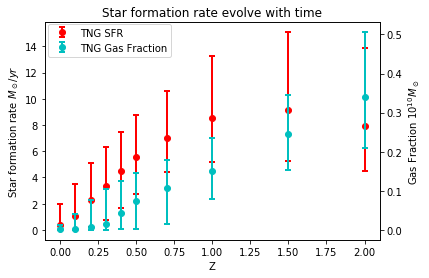

In [32]:
tng_ids = tng_diskID
il1_ids = il1_diskID

tng_SFR_Y, tng_SFR_Err = Ydata('TNG', tng_ids, tng_SFR, tng_snapshot, Redshift)
il1_SFR_Y, il1_SFR_Err = Ydata('il1', il1_ids, il1_SFR, il1_snapshot, Redshift)

tng_GF_Y, tng_GF_Err = Ydata('TNG', tng_ids, tng_GF, tng_snapshot, Redshift)
# il1_GF_Y, il1_GF_Err = Ydata('il1', il1_ids, il1_GF, il1_snapshot, Redshift)

#plot info
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('Z')
ax.set_ylabel(r'Star formation rate $M_\odot/yr$')
# ax.set_yscale("log")
# ax.set_xlim(-0.4, 0.4)
# ax.set_ylim(-0.05, 0.6)
ax.set_title(r"Star formation rate evolve with time")

#lines
p1 = ax.errorbar(Redshift, tng_SFR_Y, yerr=tng_SFR_Err, elinewidth=2, capthick=2, capsize=3, color='r', fmt='o', label='TNG SFR')
ax2 = ax.twinx()
ax2.set_ylabel(r'Gas Fraction $10^{10} M_\odot$')
p2 = ax2.errorbar(Redshift, tng_GF_Y, yerr=tng_GF_Err, elinewidth=2, capthick=2, capsize=3, color='c', fmt='o', label='TNG Gas Fraction')


fig.legend(loc=2, bbox_to_anchor=(0.1,0.9))

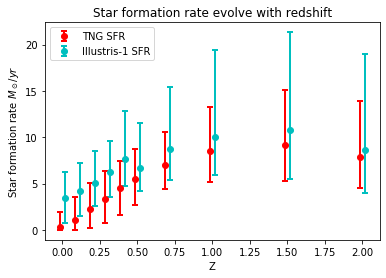

In [35]:
tng_ids = tng_diskID
il1_ids = il1_diskID

tng_SFR_Y, tng_SFR_Err = Ydata('TNG', tng_ids, tng_SFR, tng_snapshot, Redshift)
il1_SFR_Y, il1_SFR_Err = Ydata('il1', il1_ids, il1_SFR, il1_snapshot, Redshift)


#plot info
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('Z')
ax.set_ylabel(r'Star formation rate $M_\odot/yr$')
# ax.set_yscale("log")
# ax.set_xlim(-0.4, 0.4)
# ax.set_ylim(-0.4, 0.4)
ax.set_title(r"Star formation rate evolve with redshift")

#lines

ax.errorbar(Redshift-0.015, tng_SFR_Y, yerr=tng_SFR_Err, elinewidth=2, capthick=2, capsize=3, color='r', fmt='o', label='TNG SFR')
ax.errorbar(Redshift+0.015, il1_SFR_Y, yerr=il1_SFR_Err, elinewidth=2, capthick=2, capsize=3, color='c', fmt='o', label='Illustris-1 SFR')

ax.legend()

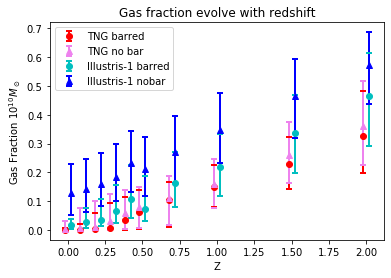

In [44]:
tng_ids = tng_barID
il1_ids = il1_barID

tng_ubID = []
for i in tng_diskID:
    if i not in tng_barID:
        tng_ubID.append(i)
il1_ubID = []
for i in il1_diskID:
    if i not in il1_barID:
        il1_ubID.append(i)
        

tng_GF_Y, tng_GF_Err = Ydata('TNG', tng_ids, tng_GF, tng_snapshot, Redshift)
il1_GF_Y, il1_GF_Err = Ydata('il1', il1_ids, il1_GF, il1_snapshot, Redshift)

tng_ub_GF, tng_ub_GF_err = Ydata('TNG', tng_ubID, tng_GF, tng_snapshot, Redshift)
il1_ub_GF, il1_ub_GF_err = Ydata('il1', il1_ubID, il1_GF, il1_snapshot, Redshift)

#plot info
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('Z')
ax.set_ylabel(r'Gas Fraction $10^{10} M_\odot$')
# ax.set_yscale("log")
# ax.set_xlim(-0.4, 0.4)
# ax.set_ylim(-0.4, 0.4)
ax.set_title(r"Gas fraction evolve with redshift")

#lines

ax.errorbar(Redshift-0.02, tng_GF_Y, yerr=tng_GF_Err, elinewidth=2, capthick=2, capsize=3, color='r', fmt='o', label='TNG barred')
ax.errorbar(Redshift-0.02, tng_ub_GF, yerr=tng_ub_GF_err, elinewidth=2, capthick=2, capsize=3, color='violet', fmt='^', label='TNG no bar')

ax.errorbar(Redshift+0.02, il1_GF_Y, yerr=il1_GF_Err, elinewidth=2, capthick=2, capsize=3, color='c', fmt='o', label='Illustris-1 barred')
ax.errorbar(Redshift+0.02, il1_ub_GF, yerr=il1_ub_GF_err, elinewidth=2, capthick=2, capsize=3, color='blue', fmt='^', label='Illustris-1 nobar')

ax.legend()
plt.savefig('f:/Linux/local_result/il1-TNG-GF.png', dpi=300)

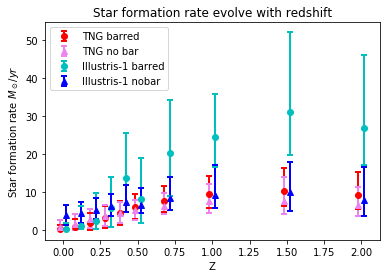

In [47]:
tng_ids = tng_barID
il1_ids = il1_barID

tng_ubID = []
for i in tng_diskID:
    if i not in tng_barID:
        tng_ubID.append(i)
il1_ubID = []
for i in il1_diskID:
    if i not in il1_barID:
        il1_ubID.append(i)


tng_SFR_Y, tng_SFR_Err = Ydata('TNG', tng_ids, tng_SFR, tng_snapshot, Redshift)
il1_SFR_Y, il1_SFR_Err = Ydata('il1', il1_ids, il1_SFR, il1_snapshot, Redshift)

tng_ub_SFR_GF, tng_ub_SFR_err = Ydata('TNG', tng_ubID, tng_SFR, tng_snapshot, Redshift)
il1_ub_SFR_GF, il1_ub_SFR_err = Ydata('il1', il1_ubID, il1_SFR, il1_snapshot, Redshift)

#plot info
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('Z')
ax.set_ylabel(r'Star formation rate $M_\odot/yr$')
# ax.set_yscale("log")
# ax.set_xlim(-0.4, 0.4)
# ax.set_ylim(-0.4, 0.4)
ax.set_title(r"Star formation rate evolve with redshift")

#lines

ax.errorbar(Redshift-0.02, tng_SFR_Y, yerr=tng_SFR_Err, elinewidth=2, capthick=2, capsize=3, color='r', fmt='o', label='TNG barred')
ax.errorbar(Redshift-0.02, tng_ub_SFR_GF, yerr=tng_ub_SFR_err, elinewidth=2, capthick=2, capsize=3, color='violet', fmt='^', label='TNG no bar')

ax.errorbar(Redshift+0.02, il1_SFR_Y, yerr=il1_SFR_Err, elinewidth=2, capthick=2, capsize=3, color='c', fmt='o', label='Illustris-1 barred')
ax.errorbar(Redshift+0.02, il1_ub_SFR_GF, yerr=il1_ub_SFR_err, elinewidth=2, capthick=2, capsize=3, color='blue', fmt='^', label='Illustris-1 nobar')

ax.legend()
plt.savefig('f:/Linux/local_result/il1-TNG-SFR.png', dpi=300)

<ErrorbarContainer object of 3 artists>

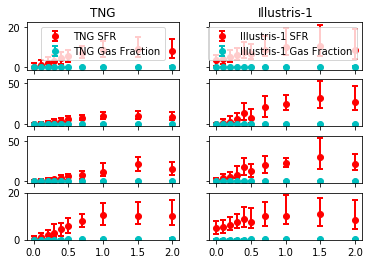

In [52]:
    fig, ax = plt.subplots(4,2, sharex='col', sharey='row', squeeze=False)
    #fig 1, 2: disk-disk
    tng_ids = tng_diskID
    il1_ids = il1_diskID

    tng_SFR_Y, tng_SFR_Err = Ydata('TNG', tng_ids, tng_SFR, tng_snapshot, Redshift)
    il1_SFR_Y, il1_SFR_Err = Ydata('il1', il1_ids, il1_SFR, il1_snapshot, Redshift)

    tng_GF_Y, tng_GF_Err = Ydata('TNG', tng_ids, tng_GF, tng_snapshot, Redshift)
    il1_GF_Y, il1_GF_Err = Ydata('il1', il1_ids, il1_GF, il1_snapshot, Redshift)

    ax[0, 0].set_title("TNG")
    ax[0, 1].set_title("Illustris-1")
    ax[0, 0].errorbar(Redshift, tng_SFR_Y, yerr=tng_SFR_Err, elinewidth=2, capthick=2, capsize=3, color='r', fmt='o', label='TNG SFR')
    ax[0, 0].errorbar(Redshift, tng_GF_Y, yerr=tng_GF_Err, elinewidth=2, capthick=2, capsize=3, color='c', fmt='o', label='TNG Gas Fraction')
    ax[0, 1].errorbar(Redshift, il1_SFR_Y, yerr=il1_SFR_Err, elinewidth=2, capthick=2, capsize=3, color='r', fmt='o', label='Illustris-1 SFR')
    ax[0, 1].errorbar(Redshift, tng_GF_Y, yerr=il1_GF_Err, elinewidth=2, capthick=2, capsize=3, color='c', fmt='o', label='Illustris-1 Gas Fraction')

    ax[0, 0].legend()
    ax[0, 1].legend()


    #fig 3, 4: bar-bar
    tng_ids = tng_barID
    il1_ids = il1_barID

    tng_SFR_Y, tng_SFR_Err = Ydata('TNG', tng_ids, tng_SFR, tng_snapshot, Redshift)
    il1_SFR_Y, il1_SFR_Err = Ydata('il1', il1_ids, il1_SFR, il1_snapshot, Redshift)

    tng_GF_Y, tng_GF_Err = Ydata('TNG', tng_ids, tng_GF, tng_snapshot, Redshift)
    il1_GF_Y, il1_GF_Err = Ydata('il1', il1_ids, il1_GF, il1_snapshot, Redshift)

    ax[1, 0].errorbar(Redshift, tng_SFR_Y, yerr=tng_SFR_Err, elinewidth=2, capthick=2, capsize=3, color='r', fmt='o', label='TNG SFR')
    ax[1, 0].errorbar(Redshift, tng_GF_Y, yerr=tng_GF_Err, elinewidth=2, capthick=2, capsize=3, color='c', fmt='o', label='TNG Gas Fraction')
    ax[1, 1].errorbar(Redshift, il1_SFR_Y, yerr=il1_SFR_Err, elinewidth=2, capthick=2, capsize=3, color='r', fmt='o', label='Illustris-1 SFR')
    ax[1, 1].errorbar(Redshift, tng_GF_Y, yerr=il1_GF_Err, elinewidth=2, capthick=2, capsize=3, color='c', fmt='o', label='Illustris-1 Gas Fraction')

    #fig 5, 6: matched bar-bar
    tng_ids = bar2bar.keys()
    il1_ids = bar2bar.values()

    tng_SFR_Y, tng_SFR_Err = Ydata('TNG', tng_ids, tng_SFR, tng_snapshot, Redshift)
    il1_SFR_Y, il1_SFR_Err = Ydata('il1', il1_ids, il1_SFR, il1_snapshot, Redshift)

    tng_GF_Y, tng_GF_Err = Ydata('TNG', tng_ids, tng_GF, tng_snapshot, Redshift)
    il1_GF_Y, il1_GF_Err = Ydata('il1', il1_ids, il1_GF, il1_snapshot, Redshift)

    ax[2, 0].errorbar(Redshift, tng_SFR_Y, yerr=tng_SFR_Err, elinewidth=2, capthick=2, capsize=3, color='r', fmt='o', label='TNG SFR')
    ax[2, 0].errorbar(Redshift, tng_GF_Y, yerr=tng_GF_Err, elinewidth=2, capthick=2, capsize=3, color='c', fmt='o', label='TNG Gas Fraction')
    ax[2, 1].errorbar(Redshift, il1_SFR_Y, yerr=il1_SFR_Err, elinewidth=2, capthick=2, capsize=3, color='r', fmt='o', label='Illustris-1 SFR')
    ax[2, 1].errorbar(Redshift, tng_GF_Y, yerr=il1_GF_Err, elinewidth=2, capthick=2, capsize=3, color='c', fmt='o', label='Illustris-1 Gas Fraction')

    #fig 7, 8: matched bar-disk
    tng_ids = bar2disk.keys()
    il1_ids = bar2disk.values()

    tng_SFR_Y, tng_SFR_Err = Ydata('TNG', tng_ids, tng_SFR, tng_snapshot, Redshift)
    il1_SFR_Y, il1_SFR_Err = Ydata('il1', il1_ids, il1_SFR, il1_snapshot, Redshift)

    tng_GF_Y, tng_GF_Err = Ydata('TNG', tng_ids, tng_GF, tng_snapshot, Redshift)
    il1_GF_Y, il1_GF_Err = Ydata('il1', il1_ids, il1_GF, il1_snapshot, Redshift)

    ax[3, 0].set_ylim(-0.1, 20)
    ax[3, 0].errorbar(Redshift, tng_SFR_Y, yerr=tng_SFR_Err, elinewidth=2, capthick=2, capsize=3, color='r', fmt='o', label='TNG SFR')
    ax[3, 0].errorbar(Redshift, tng_GF_Y, yerr=tng_GF_Err, elinewidth=2, capthick=2, capsize=3, color='c', fmt='o', label='TNG Gas Fraction')
    ax[3, 1].errorbar(Redshift, il1_SFR_Y, yerr=il1_SFR_Err, elinewidth=2, capthick=2, capsize=3, color='r', fmt='o', label='Illustris-1 SFR')
    ax[3, 1].errorbar(Redshift, tng_GF_Y, yerr=il1_GF_Err, elinewidth=2, capthick=2, capsize=3, color='c', fmt='o', label='Illustris-1 Gas Fraction')


In [54]:
def trim_axs(axs, N):
    """little helper to massage the axs list to have correct length..."""
    axs = axs.flat
    for ax in axs[N:]:
        ax.remove()
    return axs[:N]

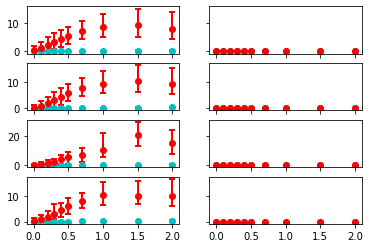

In [57]:
figsize = (10, 8)
cols = 2
rows = 4
fig, axs = plt.subplots(4, 2, sharex='col', sharey='row')
axs = trim_axs(axs, 8)
cases = [tng_diskID, il1_diskID, tng_barID, il1_barID, bar2bar.keys(), bar2bar.values(), bar2disk.keys(), bar2disk.values()]

i = 0
for ax, case in zip(axs, cases):
    if i % 2 == 0:
        simu = 'TNG'
    else:
        simu = 'il1'
    tng_SFR_Y, tng_SFR_Err = Ydata(simu, case, tng_SFR, tng_snapshot, Redshift)
    tng_GF_Y, tng_GF_Err = Ydata(simu, case, tng_GF, tng_snapshot, Redshift)
    ax.errorbar(Redshift, tng_GF_Y, yerr=tng_GF_Err, elinewidth=2, capthick=2, capsize=3, color='c', fmt='o', label='Gas Fraction')
    ax.errorbar(Redshift, tng_SFR_Y, yerr=tng_SFR_Err, elinewidth=2, capthick=2, capsize=3, color='r', fmt='o', label='SFR')
    i += 1

Text(0.5, 0, 'z')

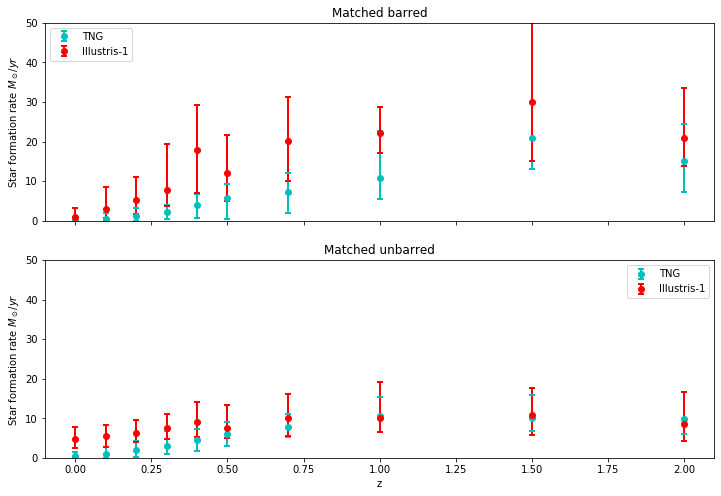

In [75]:
figsize = (12,8)
cols = 1
rows = 2
fig, axs = plt.subplots(rows, cols, sharex='col', sharey='row', figsize=figsize)
axs = trim_axs(axs, 8)
cases = [bar2bar.keys(), bar2bar.values(), bar2disk.keys(), bar2disk.values()]


tng_SFR_Y, tng_SFR_Err = Ydata('TNG', bar2bar.keys(), tng_SFR, tng_snapshot, Redshift)
il1_SFR_Y, il1_SFR_Err = Ydata('il1', bar2bar.values(), il1_SFR, il1_snapshot, Redshift)
axs[0].set_title('Matched barred')
axs[0].errorbar(Redshift, tng_SFR_Y, yerr=tng_SFR_Err, elinewidth=2, capthick=2, capsize=3, color='c', fmt='o', label='TNG')
axs[0].errorbar(Redshift, il1_SFR_Y, yerr=il1_SFR_Err, elinewidth=2, capthick=2, capsize=3, color='r', fmt='o', label='Illustris-1')

tng_SFR_Y, tng_SFR_Err = Ydata('TNG', bar2disk.keys(), tng_SFR, tng_snapshot, Redshift)
il1_SFR_Y, il1_SFR_Err = Ydata('il1', bar2disk.values(), il1_SFR, il1_snapshot, Redshift)
axs[1].set_title('Matched unbarred')
axs[1].errorbar(Redshift, tng_SFR_Y, yerr=tng_SFR_Err, elinewidth=2, capthick=2, capsize=3, color='c', fmt='o', label='TNG')
axs[1].errorbar(Redshift, il1_SFR_Y, yerr=il1_SFR_Err, elinewidth=2, capthick=2, capsize=3, color='r', fmt='o', label='Illustris-1')
axs[0].legend()
axs[1].legend()

axs[0].set_ylabel(r'Star formation rate $M_\odot/yr$')
axs[0].set_ylim(0,50)
axs[1].set_ylabel(r'Star formation rate $M_\odot/yr$')
axs[1].set_ylim(0,50)
axs[1].set_xlabel('z')

Text(0.5, 0, 'z')

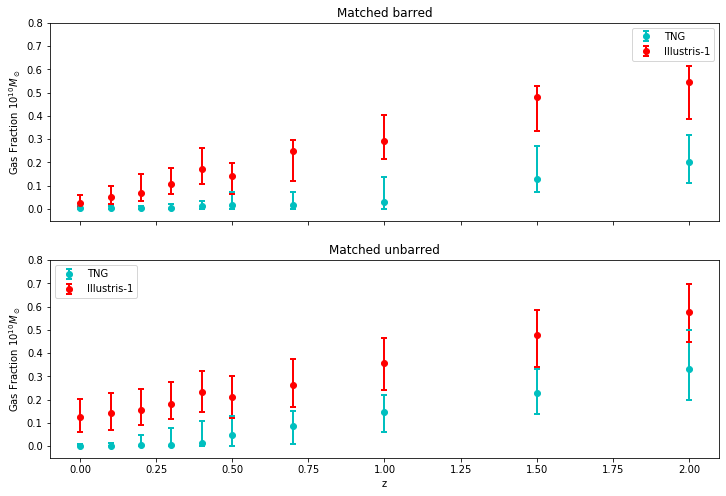

In [81]:
figsize = (12,8)
cols = 1
rows = 2
fig, axs = plt.subplots(rows, cols, sharex='col', sharey='row', figsize=figsize)
axs = trim_axs(axs, 8)
cases = [bar2bar.keys(), bar2bar.values(), bar2disk.keys(), bar2disk.values()]


tng_SFR_Y, tng_SFR_Err = Ydata('TNG', bar2bar.keys(), tng_GF, tng_snapshot, Redshift)
il1_SFR_Y, il1_SFR_Err = Ydata('il1', bar2bar.values(), il1_GF, il1_snapshot, Redshift)
axs[0].set_title('Matched barred')
axs[0].errorbar(Redshift, tng_SFR_Y, yerr=tng_SFR_Err, elinewidth=2, capthick=2, capsize=3, color='c', fmt='o', label='TNG')
axs[0].errorbar(Redshift, il1_SFR_Y, yerr=il1_SFR_Err, elinewidth=2, capthick=2, capsize=3, color='r', fmt='o', label='Illustris-1')

tng_SFR_Y, tng_SFR_Err = Ydata('TNG', bar2disk.keys(), tng_GF, tng_snapshot, Redshift)
il1_SFR_Y, il1_SFR_Err = Ydata('il1', bar2disk.values(), il1_GF, il1_snapshot, Redshift)
axs[1].set_title('Matched unbarred')
axs[1].errorbar(Redshift, tng_SFR_Y, yerr=tng_SFR_Err, elinewidth=2, capthick=2, capsize=3, color='c', fmt='o', label='TNG')
axs[1].errorbar(Redshift, il1_SFR_Y, yerr=il1_SFR_Err, elinewidth=2, capthick=2, capsize=3, color='r', fmt='o', label='Illustris-1')
axs[0].legend()
axs[1].legend()

axs[0].set_ylabel(r'Gas Fraction $10^{10} M_\odot$')
axs[0].set_ylim(-0.05,0.8)
axs[1].set_ylabel(r'Gas Fraction $10^{10} M_\odot$')
axs[1].set_ylim(-0.05,0.8)
axs[1].set_xlabel('z')

In [91]:
bar2ot = np.load('F:/Linux/localRUN/Match/tng2ot.npy',allow_pickle=1).item()

In [92]:
len(bar2ot)

167

FileNotFoundError: [Errno 2] No such file or directory: 'f:/Linux/localRUN/il1_DiskMerTree/161361.json'

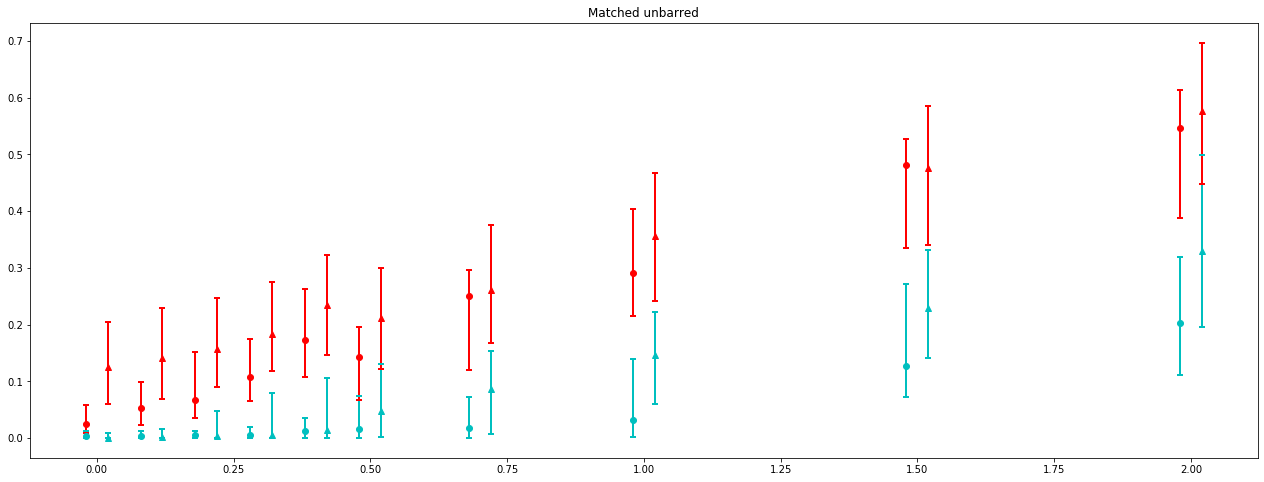

In [93]:
fig = plt.figure(figsize=(22,8))
ax = fig.add_subplot(111)

tng_SFR_Y, tng_SFR_Err = Ydata('TNG', bar2bar.keys(), tng_GF, tng_snapshot, Redshift)
il1_SFR_Y, il1_SFR_Err = Ydata('il1', bar2bar.values(), il1_GF, il1_snapshot, Redshift)
ax.set_title('Matched barred')
ax.errorbar(Redshift-0.02, tng_SFR_Y, yerr=tng_SFR_Err, elinewidth=2, capthick=2, capsize=3, color='c', fmt='o', label='TNG')
ax.errorbar(Redshift-0.02, il1_SFR_Y, yerr=il1_SFR_Err, elinewidth=2, capthick=2, capsize=3, color='r', fmt='o', label='Illustris-1')

tng_SFR_Y, tng_SFR_Err = Ydata('TNG', bar2disk.keys(), tng_GF, tng_snapshot, Redshift)
il1_SFR_Y, il1_SFR_Err = Ydata('il1', bar2disk.values(), il1_GF, il1_snapshot, Redshift)
ax.set_title('Matched unbarred')
ax.errorbar(Redshift+0.02, tng_SFR_Y, yerr=tng_SFR_Err, elinewidth=2, capthick=2, capsize=3, color='c', fmt='^')
ax.errorbar(Redshift+0.02, il1_SFR_Y, yerr=il1_SFR_Err, elinewidth=2, capthick=2, capsize=3, color='r', fmt='^')

tng_SFR_Y, tng_SFR_Err = Ydata('TNG', bar2ot.keys(), tng_GF, tng_snapshot, Redshift)
il1_SFR_Y, il1_SFR_Err = Ydata('il1', bar2ot.values(), il1_GF, il1_snapshot, Redshift)
ax.set_title('Matched unbarred')
ax.errorbar(Redshift, tng_SFR_Y, yerr=tng_SFR_Err, elinewidth=2, capthick=2, capsize=3, color='c', fmt='*')
ax.errorbar(Redshift, il1_SFR_Y, yerr=il1_SFR_Err, elinewidth=2, capthick=2, capsize=3, color='r', fmt='*')

ax.legend()
ax.legend()

ax.set_ylabel(r'Gas Fraction $10^{10} M_\odot$')
ax.set_ylim(-0.05,0.8)
ax.set_xlabel('z')
# plt.savefig('f:/Linux/local_result/GF_match.png')